# Introduction

Our project aims to identify an optimal pricing model using regression techniques to quantify what the reasonable price range of a car would be, which Atlas Motors would use for acquiring used cars for their rental fleet. Since there is complexity in determining the prices of cars due to various factors like COE, OMV and Sales Upselling, our model will reduce the frustrations and time consumption of used car purchases. 

In this study, we would be utilizing data science processes from data collection (web-scraping: BeautifulSoup, Python), data cleaning, exploratory data analysis to the model training and testing stage. The source of data comes SgCarMart, an online car sales portal in Singapore. 

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV


import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df_main = pd.read_csv('sgcarmart_used_cars_prices7.csv',index_col=0)
df_main.sample(5)

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,POST_DATE
7640,https://www.sgcarmart.com/used_cars/info.php?I...,BMW,182000.0,41210.0,26-Sep-2017,77000.0,2016.0,2362.0,Auto,58902.0,26/01/2024,49897.0,61856.0,51000.0,1305.0,2979.0,1520.0,3.0,Sports Car,25-Jan-2024
13503,https://www.sgcarmart.com/used_cars/info.php?I...,Citroen,22800.0,13470.0,30-Jul-2015,NaN,2015.0,508.0,Auto,11156.0,27/01/2024,17360.0,5000.0,55889.0,547.0,1199.0,975.0,4.0,SUV,03-Jan-2024
15874,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,116300.0,15300.0,05-May-2021,31000.0,2019.0,682.0,Auto,43703.0,27/01/2024,23675.0,10145.0,49640.0,2652.0,1496.0,1320.0,1.0,MPV,23-Jan-2024
9786,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz,119800.0,11970.0,24-Jan-2014,NaN,2013.0,740.0,Auto,NaN,26/01/2024,29525.0,28335.0,NaN,0.0,1595.0,1485.0,3.0,Luxury Sedan,20-Jan-2024
16476,https://www.sgcarmart.com/used_cars/info.php?I...,Porsche,198888.0,26390.0,10-Aug-2011,131200.0,2010.0,2938.0,Auto,43945.0,27/01/2024,57083.0,57083.0,58306.0,2738.0,2893.0,1365.0,4.0,Sports Car,25-Jan-2024


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16594 entries, 0 to 16593
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LISTING_URL                   16594 non-null  object 
 1   BRAND                         16586 non-null  object 
 2   PRICE                         16432 non-null  float64
 3   DEPRE_VALUE_PER_YEAR          15973 non-null  float64
 4   REG_DATE                      16586 non-null  object 
 5   MILEAGE_KM                    13642 non-null  float64
 6   MANUFACTURED_YEAR             16404 non-null  float64
 7   ROAD_TAX_PER_YEAR             16165 non-null  float64
 8   TRANSMISSION                  16586 non-null  object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  15740 non-null  float64
 10  SCRAPE_DATE                   16594 non-null  object 
 11  OMV                           16506 non-null  float64
 12  ARF                           16343 non-null  float64
 13  COE_FR

In [4]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE', 'POST_DATE'],
      dtype='object')

**Dropping of columns used for Web scraping but not useful in our model**

In [5]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16594 entries, 0 to 16593
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         16586 non-null  object 
 1   PRICE                         16432 non-null  float64
 2   DEPRE_VALUE_PER_YEAR          15973 non-null  float64
 3   REG_DATE                      16586 non-null  object 
 4   MILEAGE_KM                    13642 non-null  float64
 5   MANUFACTURED_YEAR             16404 non-null  float64
 6   ROAD_TAX_PER_YEAR             16165 non-null  float64
 7   TRANSMISSION                  16586 non-null  object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  15740 non-null  float64
 9   OMV                           16506 non-null  float64
 10  ARF                           16343 non-null  float64
 11  COE_FROM_SCRAPE_DATE          16022 non-null  float64
 12  DAYS_OF_COE_LEFT              16457 non-null  float64
 13  ENGINE

- BRAND: The brand of the car e.g. TOYOTA, MAZDA, NISSAN
- PRICE: The price of the car listed on SGCarmart, our Target variable 
- DEPRE_VALUE_PER_YEAR: (Cost of Asset – Salvage value of Asset)/ Depreciation Rate per Year
- REG_DATE: The date the car was registered
- MILEAGE_KM: The total distance driven by the car in KM
- MANUFACTURED_YEAR: The year the car was manufactured
- ROAD_TAX_PER_YEAR: Tax the car owner has to pay for using the road. Calculated using a complex formula based on the size and type of the vehicle and its propulsion system
- TRANSMISSION: The gearbox of the car (Either MANUAL or AUTOMATIC)
- DEREG_VALUE_FROM_SCRAPE_DATE: The deregistration value of a vehicle is amount one will get back from the government upon deregistering the vehicle for use in Singapore. 
    - It is the sum of the COE rebate and the PARF rebate.The COE rebate is a percentage of the original COE value.The PARF rebate is a percentage of the original OMV (Open Market Value).
- OMV: OMV is Open Market Value. It is the actual price of the vehicle. This price is not inclusive of COE, ARF, registration fees, taxes and surcharges . OMV prices can differ even if it is the same vehicle make and model.
- ARF: The Additional Registration Fee (ARF) is a tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle.
- COE_FROM_SCRAPE_DATE: Certificate of entitlement. It is an amount that you pay the Land Transport Authority (LTA) for registering your car in Singapore for local use.
- DAYS_OF_COE_LEFT: Number of days left till COE renewal 
- ENGINE_CAPACITY_CC: Size of the Engine
- CURB_WEIGHT_KG: Curb weight is the total weight (mass) of an automobile when not loaded with either passengers or cargo.
- NO_OF_OWNERS: Number of past owners for this vehicle
- VEHICLE_TYPE: Type of the vehicle e.g. SUV, Hatchback, Sports Car
- POST_DATE: The date the vehicle was listed on SGCarmart

# Data Visualizations

### Numerical Data Distribution

In [6]:
num_var=['PRICE',
         'DEPRE_VALUE_PER_YEAR',
         'MILEAGE_KM',
         'ROAD_TAX_PER_YEAR',
         'DEREG_VALUE_FROM_SCRAPE_DATE',
         'OMV',
         'ARF',
         'COE_FROM_SCRAPE_DATE',
         'DAYS_OF_COE_LEFT',
         'ENGINE_CAPACITY_CC',
         'CURB_WEIGHT_KG',
         'NO_OF_OWNERS'
        ]

df_num=df_clean[num_var]
df_num.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
0,80800.0,22520.0,121000.0,1202.0,51892.0,52959.0,67327.0,54920.0,762.0,1991.0,1680.0,2.0
1,18000.0,15330.0,NaN,1144.0,10880.0,24683.0,11557.0,63990.0,277.0,1560.0,1520.0,2.0
2,130800.0,20890.0,29000.0,976.0,45808.0,30800.0,35120.0,35906.0,1976.0,1798.0,1430.0,2.0
3,196800.0,39190.0,NaN,1194.0,77147.0,63495.0,86291.0,53711.0,1126.0,1984.0,1845.0,3.0
4,222800.0,29500.0,30500.0,1792.0,60821.0,37576.0,44607.0,40301.0,2466.0,2493.0,1920.0,2.0


array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'DEPRE_VALUE_PER_YEAR'}>,
        <Axes: title={'center': 'MILEAGE_KM'}>],
       [<Axes: title={'center': 'ROAD_TAX_PER_YEAR'}>,
        <Axes: title={'center': 'DEREG_VALUE_FROM_SCRAPE_DATE'}>,
        <Axes: title={'center': 'OMV'}>],
       [<Axes: title={'center': 'ARF'}>,
        <Axes: title={'center': 'COE_FROM_SCRAPE_DATE'}>,
        <Axes: title={'center': 'DAYS_OF_COE_LEFT'}>],
       [<Axes: title={'center': 'ENGINE_CAPACITY_CC'}>,
        <Axes: title={'center': 'CURB_WEIGHT_KG'}>,
        <Axes: title={'center': 'NO_OF_OWNERS'}>]], dtype=object)

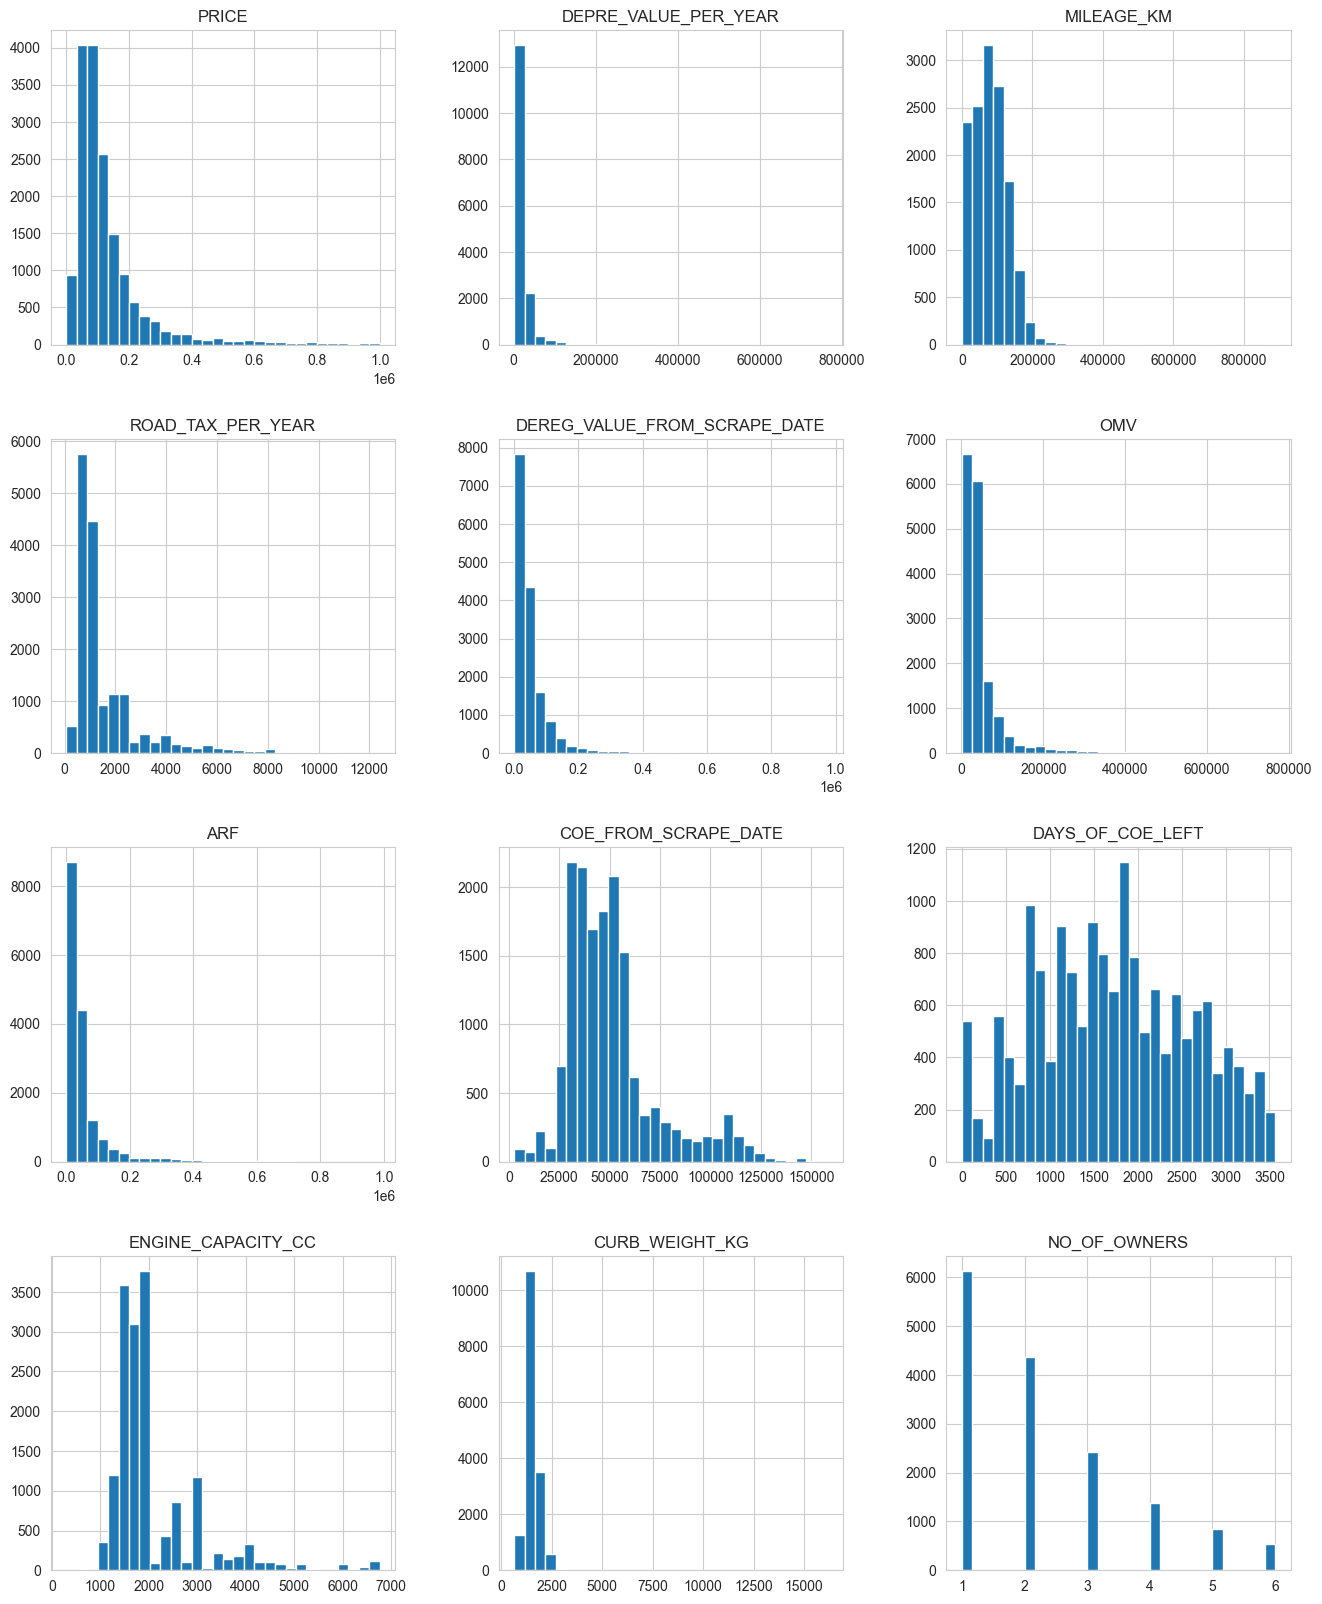

In [7]:
df_num.hist(figsize=(16, 20),bins=30)

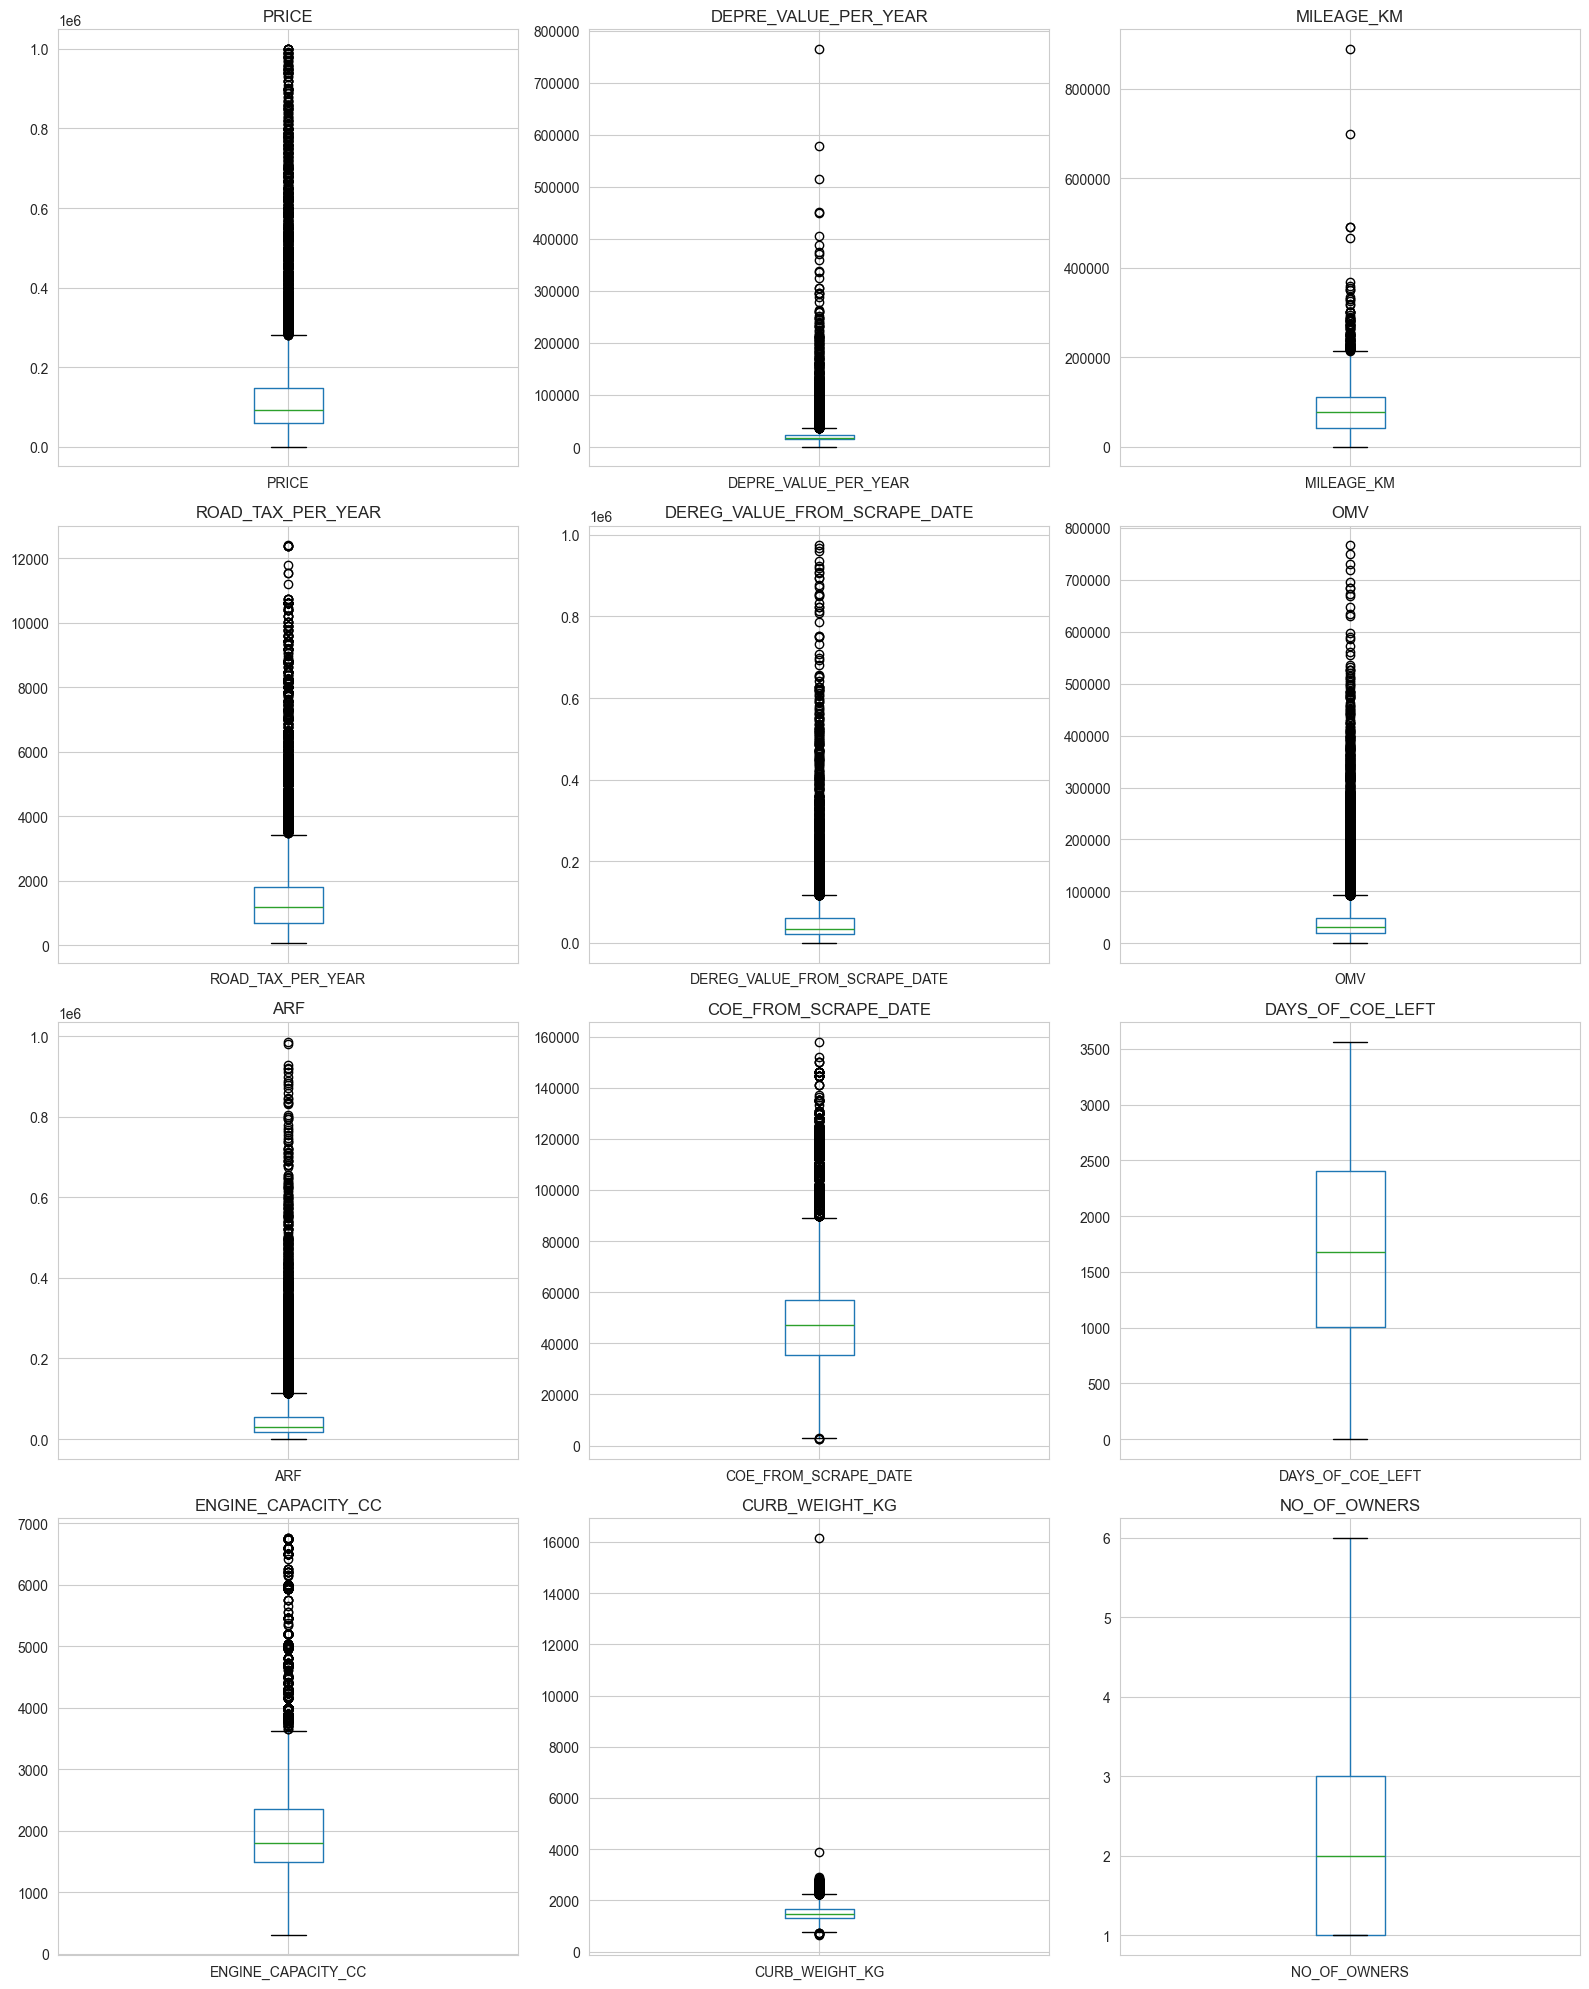

In [8]:
plt.figure(figsize=(16, 20))

for column in df_num.columns:
    plt.subplot(4, 3, df_num.columns.get_loc(column) + 1)  # Adjust subplot layout as needed
    df_num.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

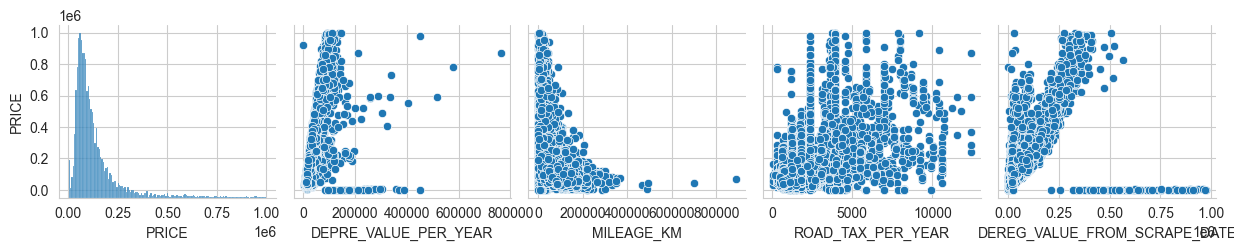

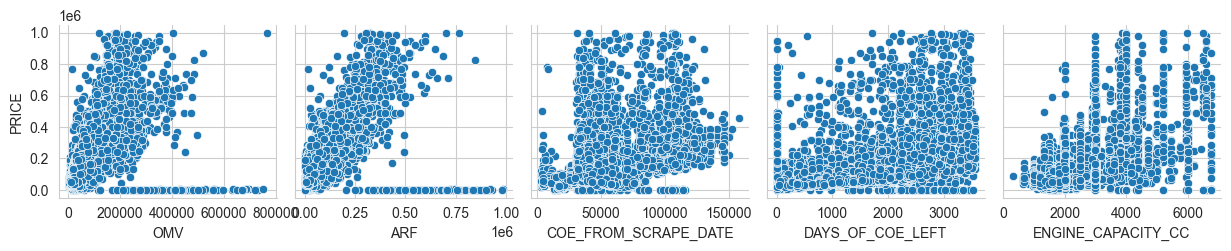

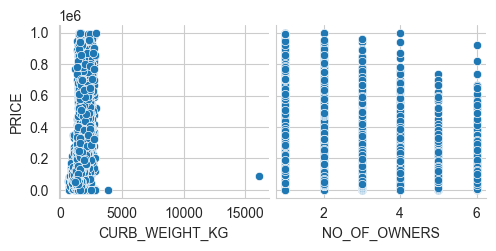

In [9]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['PRICE'])

### Categorical Data Distribution

In [10]:
cat_var=['BRAND',
         'MANUFACTURED_YEAR',
         'TRANSMISSION',
         'VEHICLE_TYPE'
#         'REG_DATE',
#         'POST_DATE'        
]

df_cat=df_clean[cat_var]
df_cat.head()

,BRAND,MANUFACTURED_YEAR,TRANSMISSION,VEHICLE_TYPE
0,Mercedes-Benz,2015.0,Auto,Luxury Sedan
1,Peugeot,2014.0,Auto,NaN
2,Renault,2018.0,Auto,Sports Car
3,Porsche,2017.0,Auto,SUV
4,Toyota,2019.0,Auto,MPV


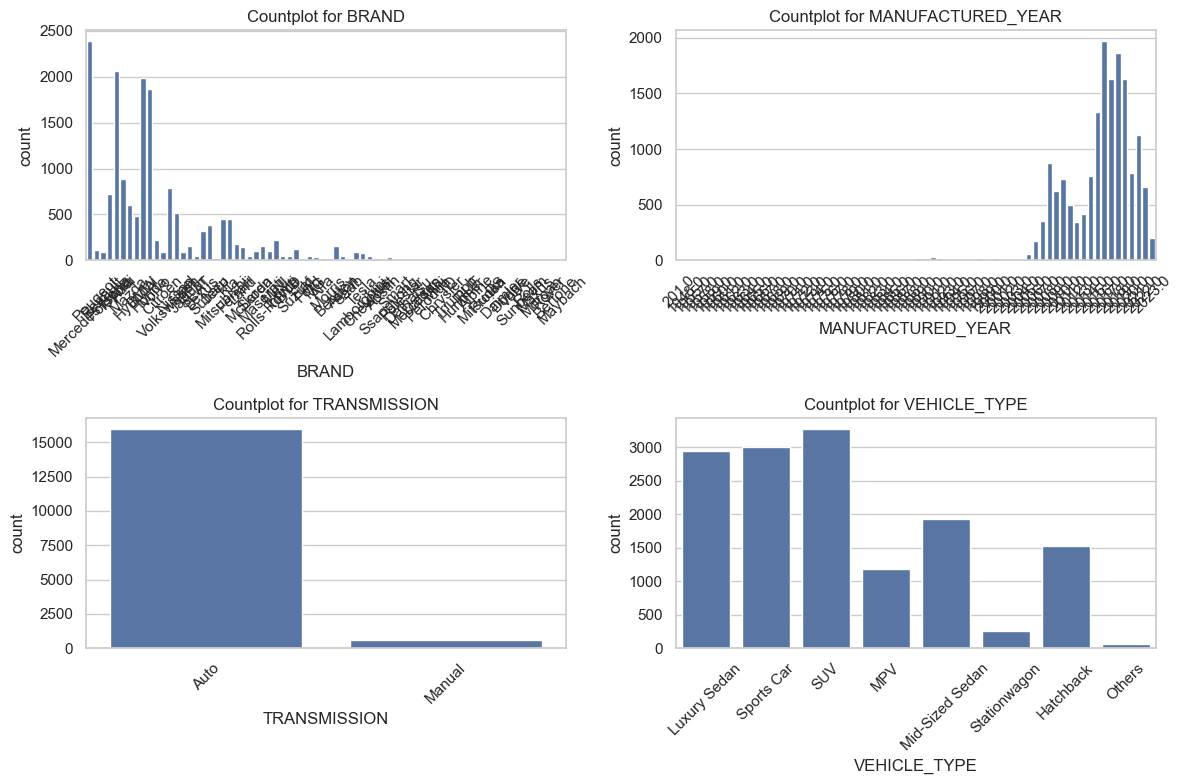

In [11]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Optional: Set the plot style

for i, column in enumerate(df_cat.columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, data=df_cat)
    plt.xticks(rotation=45)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

In [12]:
# plt.figure(figsize = (12, 6))
# ax = sns.boxplot(x='VEHICLE_TYPE', y='PRICE', data=df_clean)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
# plt.xticks(rotation=45)

# Data Pre-Processing

## Dropping Missing Rows

In [17]:
dropped_data=df_clean.dropna()

In [18]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10311 entries, 0 to 16591
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         10311 non-null  object 
 1   PRICE                         10311 non-null  float64
 2   DEPRE_VALUE_PER_YEAR          10311 non-null  float64
 3   REG_DATE                      10311 non-null  object 
 4   MILEAGE_KM                    10311 non-null  float64
 5   MANUFACTURED_YEAR             10311 non-null  float64
 6   ROAD_TAX_PER_YEAR             10311 non-null  float64
 7   TRANSMISSION                  10311 non-null  object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  10311 non-null  float64
 9   OMV                           10311 non-null  float64
 10  ARF                           10311 non-null  float64
 11  COE_FROM_SCRAPE_DATE          10311 non-null  float64
 12  DAYS_OF_COE_LEFT              10311 non-null  float64
 13  ENGINE

## Feature Extraction: Add CAR_AGE Column

In [19]:
df_clean=dropped_data
df_main['SCRAPE_DATE'] = pd.to_datetime(df_main['SCRAPE_DATE'])
df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)
df_clean['CAR_AGE'] = df_main['SCRAPE_DATE'].dt.year  - df_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
df_clean['CAR_AGE'].astype(int)

C:\Users\Samuel Thong\AppData\Local\Temp\ipykernel_15332\3768474546.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_main['SCRAPE_DATE'] = pd.to_datetime(df_main['SCRAPE_DATE'])


0         9
2         6
4         5
5        14
7         6
         ..
16586    13
16587     3
16588    12
16589    13
16591     9
Name: CAR_AGE, Length: 10311, dtype: int32

## Feature Extraction: Add POST_AGE Column

In [20]:
df_clean['POST_DATE'] = pd.to_datetime(df_clean['POST_DATE'])
df_clean['POST_AGE'] = (df_main['SCRAPE_DATE'] - df_clean['POST_DATE'])
df_clean['POST_AGE']=df_clean['POST_AGE'].dt.days

In [21]:
df_clean.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,POST_DATE,CAR_AGE,POST_AGE
0,Mercedes-Benz,80800.0,22520.0,29-Feb-2016,121000.0,2015,1202.0,Auto,51892.0,52959.0,67327.0,54920.0,762.0,1991.0,1680.0,2.0,Luxury Sedan,2024-01-06,9.0,20
2,Renault,130800.0,20890.0,28-Jun-2019,29000.0,2018,976.0,Auto,45808.0,30800.0,35120.0,35906.0,1976.0,1798.0,1430.0,2.0,Sports Car,2023-11-22,6.0,65
4,Toyota,222800.0,29500.0,12-Nov-2020,30500.0,2019,1792.0,Auto,60821.0,37576.0,44607.0,40301.0,2466.0,2493.0,1920.0,2.0,MPV,2024-01-13,5.0,13
5,Audi,98800.0,15160.0,03-Aug-2010,233000.0,2010,1672.0,Auto,21870.0,39681.0,39681.0,33568.0,2375.0,1984.0,1615.0,3.0,Luxury Sedan,2024-01-06,14.0,20
7,Mazda,88000.0,15660.0,29-Jan-2019,120000.0,2018,1210.0,Auto,31136.0,19030.0,19030.0,33689.0,1827.0,1998.0,1515.0,2.0,Luxury Sedan,2024-01-01,6.0,25


## Feature Engineering: One-Hot Encoding of TRANSMISSION Column

In [22]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,POST_DATE,CAR_AGE,POST_AGE,TRANSMISSION
15695,Subaru,45800.0,14490.0,20-Sep-2016,98000.0,2015,744.0,22577.0,14910.0,14910.0,51506.0,943.0,1600.0,1480.0,1.0,SUV,2024-01-17,9.0,10,1
11272,Mercedes-Benz,102800.0,20330.0,10-Jan-2018,94000.0,2017,740.0,47684.0,37695.0,44773.0,47002.0,1128.0,1595.0,1425.0,2.0,Luxury Sedan,2024-01-25,7.0,2,1
12230,BMW,109800.0,17710.0,31-Dec-2018,29118.0,2018,684.0,46716.0,37835.0,44969.0,30959.0,1493.0,1499.0,1415.0,3.0,SUV,2024-01-20,6.0,7,1
8382,Honda,42000.0,14880.0,18-Jul-2016,131000.0,2016,682.0,19156.0,20258.0,10362.0,52301.0,881.0,1496.0,1190.0,2.0,SUV,2024-01-07,8.0,19,1
2282,Mercedes-Benz,170888.0,24750.0,13-Nov-2019,64000.0,2019,1202.0,65257.0,44771.0,54680.0,41805.0,2102.0,1991.0,1735.0,2.0,SUV,2023-12-13,5.0,44,1


## Feature Engineering: One-Hot Encoding of VEHICLE_TYPE Column


In [23]:
veh_list=[]
for veh in df_clean['VEHICLE_TYPE'].unique():
    veh_list.append(veh)

veh_list.sort()
out = map(lambda x:x.lower(), veh_list)
veh_list = list(out) 
print(veh_list)

['hatchback', 'luxury sedan', 'mpv', 'mid-sized sedan', 'others', 'suv', 'sports car', 'stationwagon']


In [24]:
df_clean['VEHICLE_TYPE']
df_encoded = pd.get_dummies(df_clean['VEHICLE_TYPE'], prefix='VEHICLE_TYPE')

# Concatenating the new columns to the original DataFrame
df_encoded = df_encoded.astype(int)
df_clean = pd.concat([df_clean, df_encoded], axis=1)
df_clean.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,...,POST_AGE,TRANSMISSION,VEHICLE_TYPE_Hatchback,VEHICLE_TYPE_Luxury Sedan,VEHICLE_TYPE_MPV,VEHICLE_TYPE_Mid-Sized Sedan,VEHICLE_TYPE_Others,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon
0,Mercedes-Benz,80800.0,22520.0,29-Feb-2016,121000.0,2015,1202.0,51892.0,52959.0,67327.0,...,20,1,0,1,0,0,0,0,0,0
2,Renault,130800.0,20890.0,28-Jun-2019,29000.0,2018,976.0,45808.0,30800.0,35120.0,...,65,1,0,0,0,0,0,0,1,0
4,Toyota,222800.0,29500.0,12-Nov-2020,30500.0,2019,1792.0,60821.0,37576.0,44607.0,...,13,1,0,0,1,0,0,0,0,0
5,Audi,98800.0,15160.0,03-Aug-2010,233000.0,2010,1672.0,21870.0,39681.0,39681.0,...,20,1,0,1,0,0,0,0,0,0
7,Mazda,88000.0,15660.0,29-Jan-2019,120000.0,2018,1210.0,31136.0,19030.0,19030.0,...,25,1,0,1,0,0,0,0,0,0


## Feature Engineering: Categorization of BRAND Column


In [25]:
# Renaming Brand Names to their actual names
df_clean2=df_clean
df_clean2.loc[df_clean2['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
df_clean2.loc[df_clean2['BRAND'] == 'Land','BRAND'] = 'Land Rover'
df_clean2.loc[df_clean2['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'
# Cleaning whitespaces from the values in "Brand" to prevent any messup later
df_clean2['BRAND'].apply(str.strip)
pd.set_option("display.max_rows", None)
print("\nValue Counts of Brands:\n", df_clean2.loc[:,'BRAND'].value_counts())
print("\n# of Brands:", len(df_clean2.loc[:,'BRAND'].value_counts()))


Value Counts of Brands:
 BRAND
Mercedes-Benz    1465
BMW              1265
Toyota           1152
Honda            1070
Audi              564
Volkswagen        501
Porsche           457
Mazda             435
Hyundai           351
Nissan            347
Kia               305
Subaru            286
Mitsubishi        260
Lexus             216
Volvo             164
MINI              159
Bentley           117
Ferrari           114
Maserati          102
Jaguar             99
Skoda              93
Land Rover         74
Opel               66
Rolls-Royce        65
Lamborghini        63
Suzuki             60
Peugeot            60
Aston Martin       43
SEAT               42
Ford               41
McLaren            40
Chevrolet          38
Citroen            37
Infiniti           30
Jeep               18
Renault            16
Alfa Romeo         16
Ssangyong          13
MG                 12
Lotus              11
Daihatsu            5
Fiat                5
Perodua             5
Alpine              4


In [26]:
category_brands = {
    'EXOTIC': ['Koenigsegg','Bugatti','Ferrari', 'Lamborghini','Aston Martin','McLaren','Hummer'],
    'ULTRA_LUXURY': ['Porsche','Maserati','Rolls-Royce', 'Land Rover','Bentley','Maybach'],
    'LUXURY': ['MINI','Mini','Alfa Romeo','Mercedes','Mercedes-Benz', 'BMW', 'Audi', 'Lexus','Jeep','Lotus','Volvo','Peugeot','Tesla','BYD','Acura','Cadillac','Jaguar','Infiniti','Chrysler','Lincoln','Genesis'],
    'MID_LEVEL': ['Volkswagen','Renault','Ford', 'Chevrolet'],
    'ECONOMY': ['Toyota','Honda','Hyundai', 'Kia', 'Nissan', 'Mazda','Mitsubishi','Subaru','Suzuki','Citroen','Proton','Ssangyong','Daihatsu','Fiat','Skoda','Opel','MG','SEAT','Perodua'],
    'OTHERS': []  # An empty list for unspecified brands
}

# Reversing the categorization based on the 'Brand' column
df_clean2['CAR_CATEGORY'] = df_clean2['BRAND'].apply(lambda x: next((category for category, brands in category_brands.items() if x in brands), 'OTHERS'))

# Displaying the DataFrame with the new 'Category' column
print(df_clean2[['BRAND', 'CAR_CATEGORY']])

               BRAND  CAR_CATEGORY
0      Mercedes-Benz        LUXURY
2            Renault     MID_LEVEL
4             Toyota       ECONOMY
5               Audi        LUXURY
7              Mazda       ECONOMY
8               Audi        LUXURY
9      Mercedes-Benz        LUXURY
11            Toyota       ECONOMY
12           Hyundai       ECONOMY
13               BMW        LUXURY
14             Honda       ECONOMY
16             Mazda       ECONOMY
17             Volvo        LUXURY
20     Mercedes-Benz        LUXURY
22     Mercedes-Benz        LUXURY
26            Toyota       ECONOMY
28               BMW        LUXURY
29              Opel       ECONOMY
30     Mercedes-Benz        LUXURY
31             Honda       ECONOMY
32             Mazda       ECONOMY
34            Jaguar        LUXURY
35     Mercedes-Benz        LUXURY
36              SEAT       ECONOMY
41               BMW        LUXURY
43           Hyundai       ECONOMY
44             Lexus        LUXURY
45        Volkswagen

In [27]:
df_encoded = pd.get_dummies(df_clean2['CAR_CATEGORY'], prefix='CAR_CATEGORY')

# Concatenating the new columns to the original DataFrame
df_encoded = df_encoded.astype(int)
df_clean2 = pd.concat([df_clean2, df_encoded], axis=1)
df_clean2.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,...,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon,CAR_CATEGORY,CAR_CATEGORY_ECONOMY,CAR_CATEGORY_EXOTIC,CAR_CATEGORY_LUXURY,CAR_CATEGORY_MID_LEVEL,CAR_CATEGORY_OTHERS,CAR_CATEGORY_ULTRA_LUXURY
0,Mercedes-Benz,80800.0,22520.0,29-Feb-2016,121000.0,2015,1202.0,51892.0,52959.0,67327.0,...,0,0,0,LUXURY,0,0,1,0,0,0
2,Renault,130800.0,20890.0,28-Jun-2019,29000.0,2018,976.0,45808.0,30800.0,35120.0,...,0,1,0,MID_LEVEL,0,0,0,1,0,0
4,Toyota,222800.0,29500.0,12-Nov-2020,30500.0,2019,1792.0,60821.0,37576.0,44607.0,...,0,0,0,ECONOMY,1,0,0,0,0,0
5,Audi,98800.0,15160.0,03-Aug-2010,233000.0,2010,1672.0,21870.0,39681.0,39681.0,...,0,0,0,LUXURY,0,0,1,0,0,0
7,Mazda,88000.0,15660.0,29-Jan-2019,120000.0,2018,1210.0,31136.0,19030.0,19030.0,...,0,0,0,ECONOMY,1,0,0,0,0,0


In [46]:
df_clean_log=df_clean2.copy()
df_clean_log["MILEAGE_KM"] = df_clean_log['MILEAGE_KM'].apply(np.log)

df_clean_log["DEPRE_VALUE_PER_YEAR"] = df_clean_log['DEPRE_VALUE_PER_YEAR'].apply(np.log)
df_clean_log["ROAD_TAX_PER_YEAR"] = df_clean_log['ROAD_TAX_PER_YEAR'].apply(np.log)
df_clean_log["DEREG_VALUE_FROM_SCRAPE_DATE"] = df_clean_log['DEREG_VALUE_FROM_SCRAPE_DATE'].apply(np.log)
df_clean_log["OMV"] = df_clean_log['OMV'].apply(np.log)
df_clean_log["ARF"] = df_clean_log['ARF'].apply(np.log)
df_clean_log["COE_FROM_SCRAPE_DATE"] = df_clean_log['COE_FROM_SCRAPE_DATE'].apply(np.log)
#df_clean_log["DAYS_OF_COE_LEFT"] = df_clean_log['DAYS_OF_COE_LEFT'].apply(np.log)
df_clean_log["ENGINE_CAPACITY_CC"] = df_clean_log['ENGINE_CAPACITY_CC'].apply(np.log)
df_clean_log["CURB_WEIGHT_KG"] = df_clean_log['CURB_WEIGHT_KG'].apply(np.log)

pd.set_option('display.max_columns', None)

df_clean_log.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,POST_DATE,CAR_AGE,POST_AGE,TRANSMISSION,VEHICLE_TYPE_Hatchback,VEHICLE_TYPE_Luxury Sedan,VEHICLE_TYPE_MPV,VEHICLE_TYPE_Mid-Sized Sedan,VEHICLE_TYPE_Others,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon,CAR_CATEGORY,CAR_CATEGORY_ECONOMY,CAR_CATEGORY_EXOTIC,CAR_CATEGORY_LUXURY,CAR_CATEGORY_MID_LEVEL,CAR_CATEGORY_OTHERS,CAR_CATEGORY_ULTRA_LUXURY
0,Mercedes-Benz,80800.0,10.022159,29-Feb-2016,11.703546,2015,7.091742,10.856920,10.877273,11.117317,10.913633,762.0,7.596392,7.426549,2.0,Luxury Sedan,2024-01-06,9.0,20,1,0,1,0,0,0,0,0,0,LUXURY,0,0,1,0,0,0
2,Renault,130800.0,9.947026,28-Jun-2019,10.275051,2018,6.883463,10.732214,10.335270,10.466526,10.488660,1976.0,7.494430,7.265430,2.0,Sports Car,2023-11-22,6.0,65,1,0,0,0,0,0,0,1,0,MID_LEVEL,0,0,0,1,0,0
4,Toyota,222800.0,10.292146,12-Nov-2020,10.325482,2019,7.491088,11.015690,10.534121,10.705646,10.604132,2466.0,7.821242,7.560080,2.0,MPV,2024-01-13,5.0,13,1,0,0,1,0,0,0,0,0,ECONOMY,1,0,0,0,0,0
5,Audi,98800.0,9.626416,03-Aug-2010,12.358794,2010,7.421776,9.992871,10.588628,10.588628,10.421329,2375.0,7.592870,7.387090,3.0,Luxury Sedan,2024-01-06,14.0,20,1,0,1,0,0,0,0,0,0,LUXURY,0,0,1,0,0,0
7,Mazda,88000.0,9.658865,29-Jan-2019,11.695247,2018,7.098376,10.346120,9.853772,9.853772,10.424927,1827.0,7.599902,7.323171,2.0,Luxury Sedan,2024-01-01,6.0,25,1,0,1,0,0,0,0,0,0,ECONOMY,1,0,0,0,0,0


# Data Visualizations

### Numerical Data Distribution

In [48]:
num_var=['PRICE',
         'DEPRE_VALUE_PER_YEAR',
         'MILEAGE_KM',
         'ROAD_TAX_PER_YEAR',
         'DEREG_VALUE_FROM_SCRAPE_DATE',
         'OMV',
         'ARF',
         'COE_FROM_SCRAPE_DATE',
         'DAYS_OF_COE_LEFT',
         'ENGINE_CAPACITY_CC',
         'CURB_WEIGHT_KG',
         'NO_OF_OWNERS',
         'CAR_AGE',
         'POST_AGE'
        ]

df_num=df_clean_log[num_var]
df_num.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,CAR_AGE,POST_AGE
0,80800.0,10.022159,11.703546,7.091742,10.856920,10.877273,11.117317,10.913633,762.0,7.596392,7.426549,2.0,9.0,20
2,130800.0,9.947026,10.275051,6.883463,10.732214,10.335270,10.466526,10.488660,1976.0,7.494430,7.265430,2.0,6.0,65
4,222800.0,10.292146,10.325482,7.491088,11.015690,10.534121,10.705646,10.604132,2466.0,7.821242,7.560080,2.0,5.0,13
5,98800.0,9.626416,12.358794,7.421776,9.992871,10.588628,10.588628,10.421329,2375.0,7.592870,7.387090,3.0,14.0,20
7,88000.0,9.658865,11.695247,7.098376,10.346120,9.853772,9.853772,10.424927,1827.0,7.599902,7.323171,2.0,6.0,25


array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'DEPRE_VALUE_PER_YEAR'}>,
        <Axes: title={'center': 'MILEAGE_KM'}>,
        <Axes: title={'center': 'ROAD_TAX_PER_YEAR'}>],
       [<Axes: title={'center': 'DEREG_VALUE_FROM_SCRAPE_DATE'}>,
        <Axes: title={'center': 'OMV'}>, <Axes: title={'center': 'ARF'}>,
        <Axes: title={'center': 'COE_FROM_SCRAPE_DATE'}>],
       [<Axes: title={'center': 'DAYS_OF_COE_LEFT'}>,
        <Axes: title={'center': 'ENGINE_CAPACITY_CC'}>,
        <Axes: title={'center': 'CURB_WEIGHT_KG'}>,
        <Axes: title={'center': 'NO_OF_OWNERS'}>],
       [<Axes: title={'center': 'CAR_AGE'}>,
        <Axes: title={'center': 'POST_AGE'}>, <Axes: >, <Axes: >]],
      dtype=object)

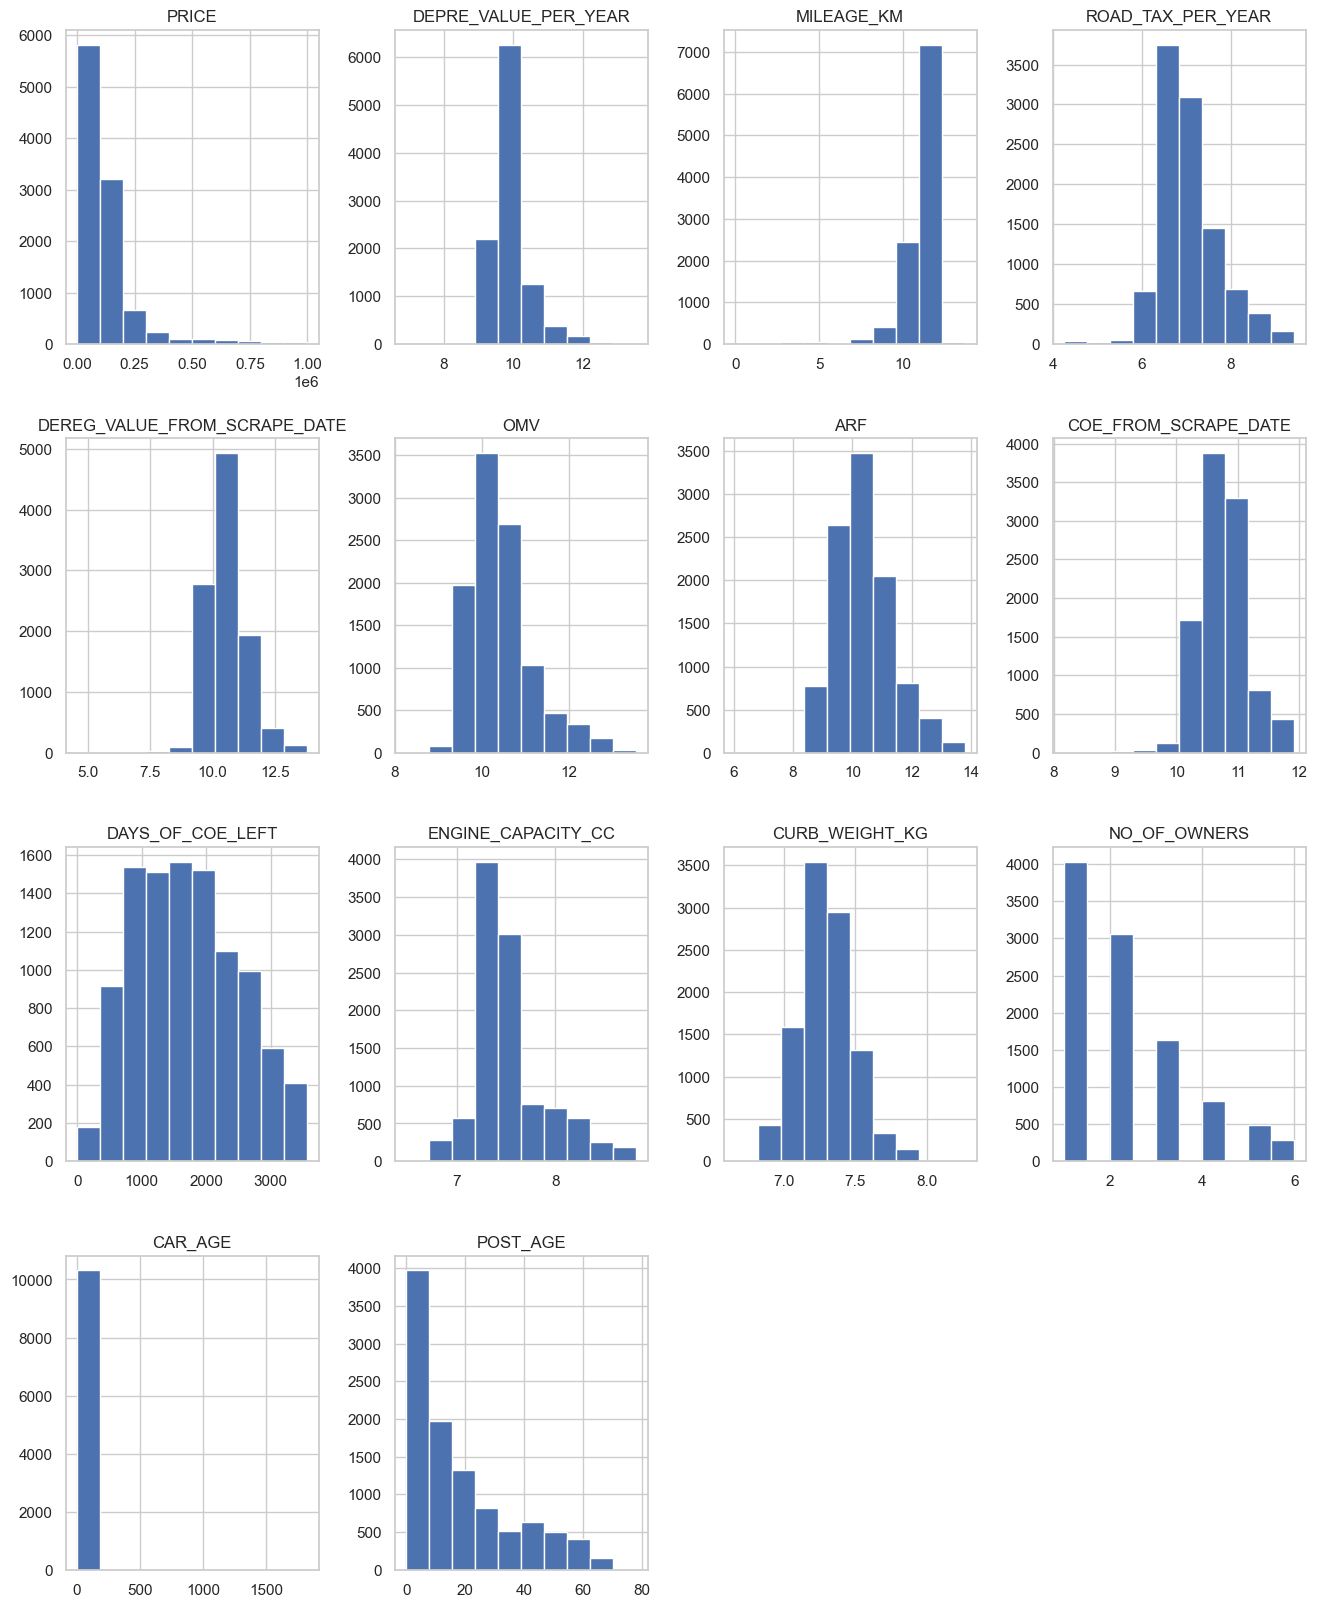

In [49]:
df_num.hist(figsize=(16, 20))

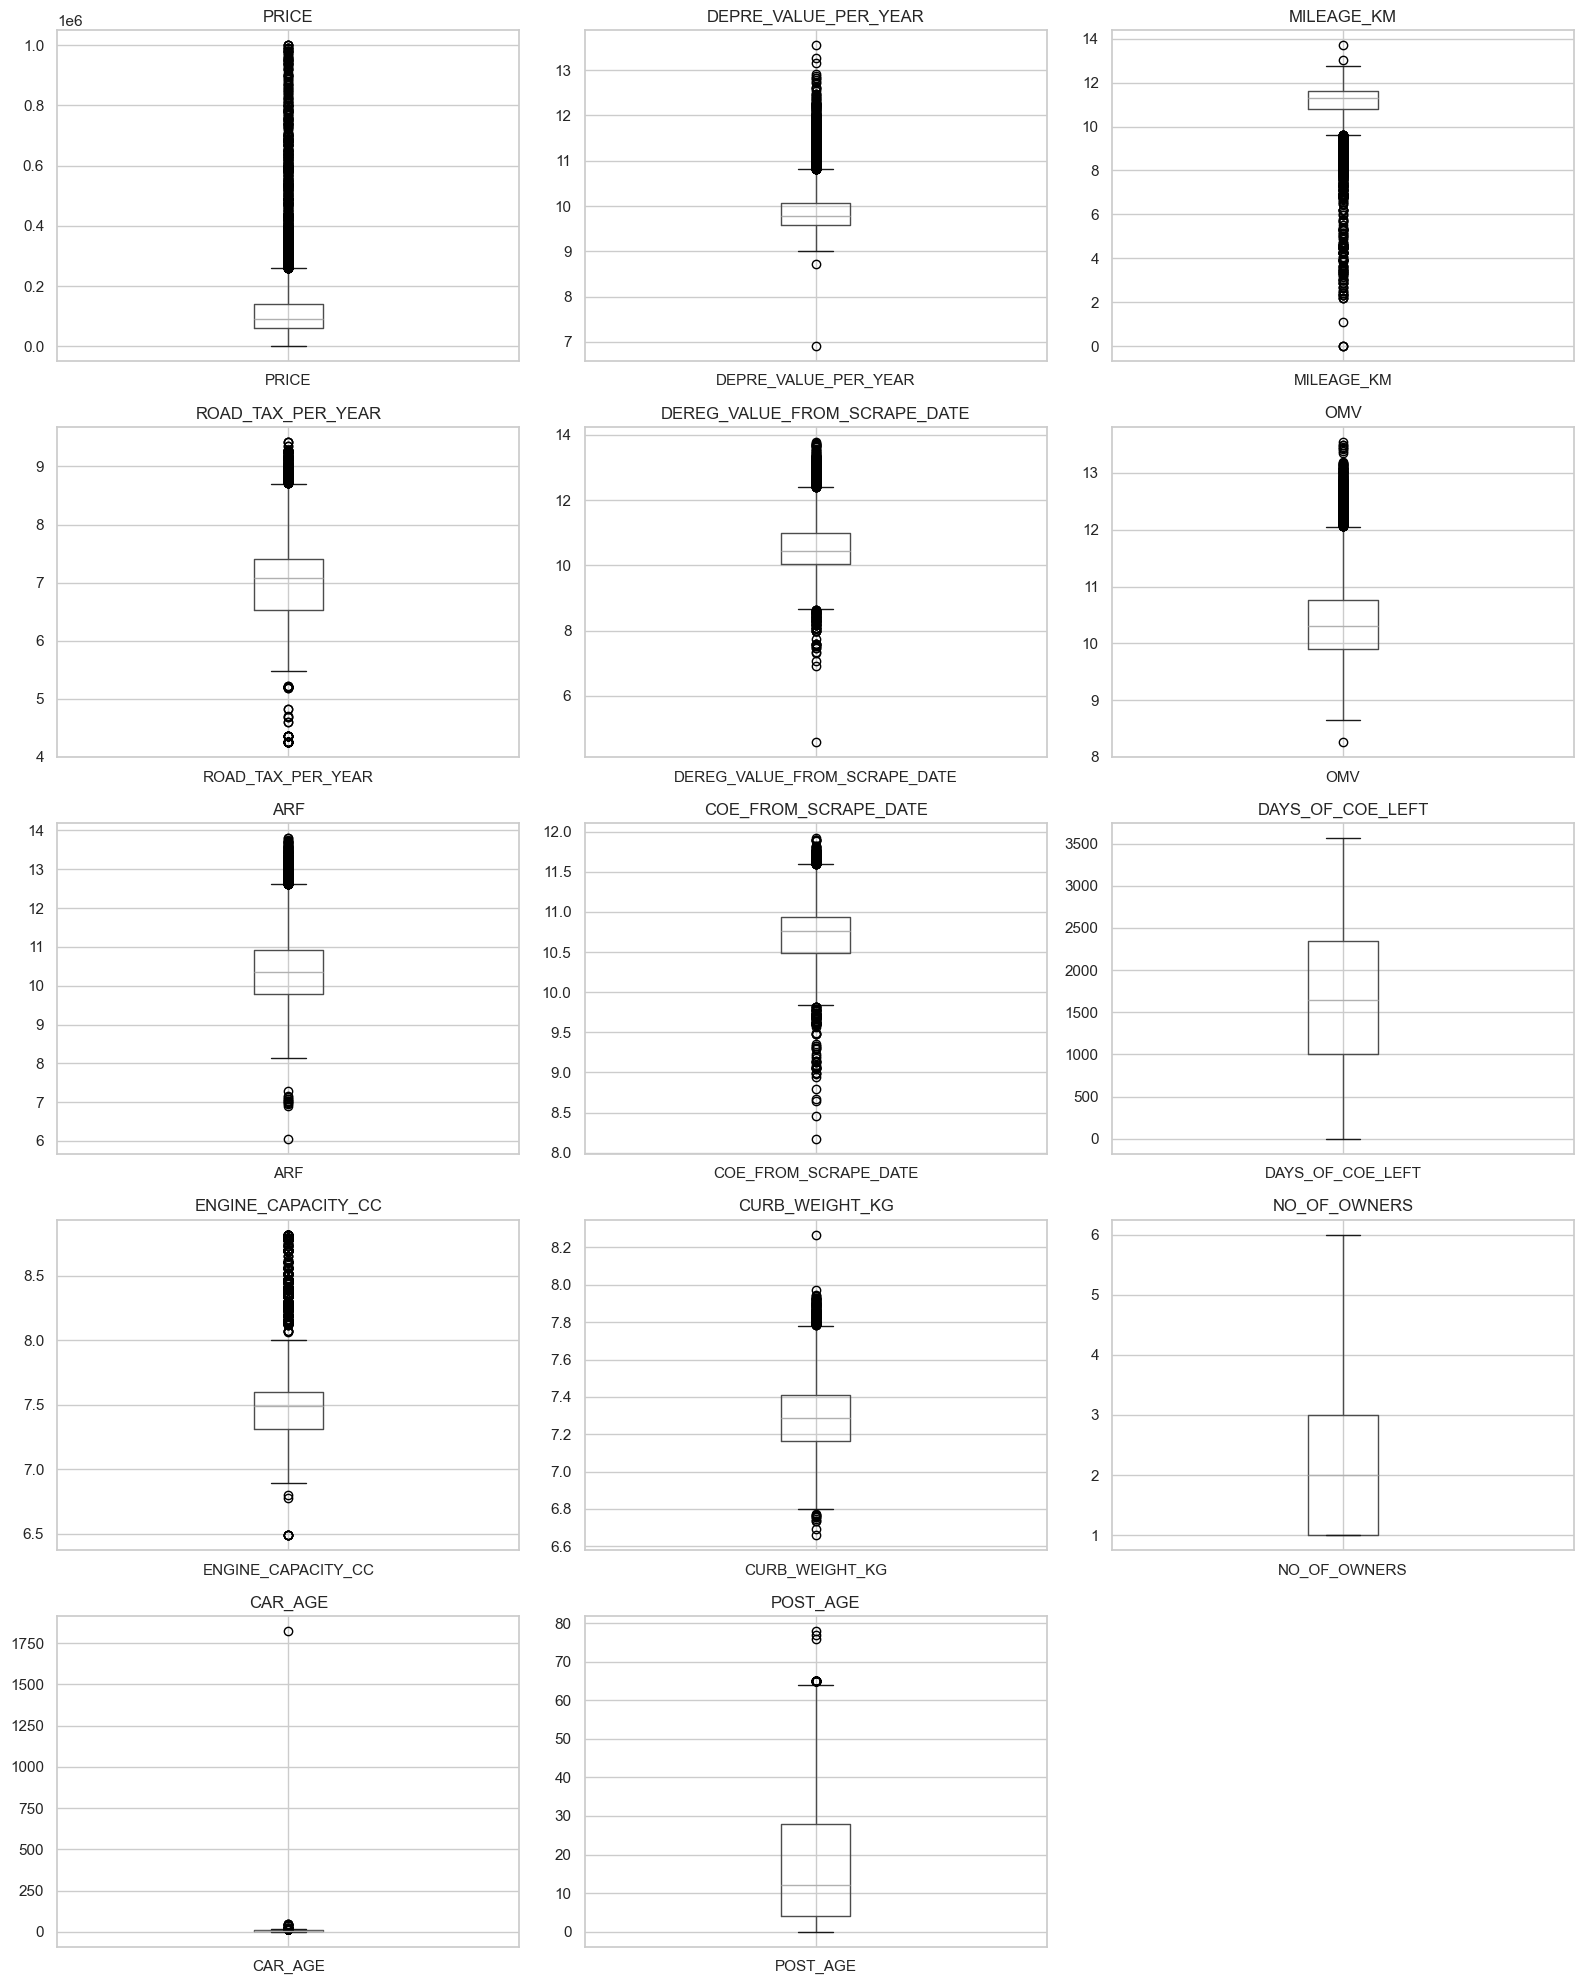

In [50]:
plt.figure(figsize=(16, 20))

for column in df_num.columns:
    plt.subplot(5, 3, df_num.columns.get_loc(column) + 1)  # Adjust subplot layout as needed
    df_num.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

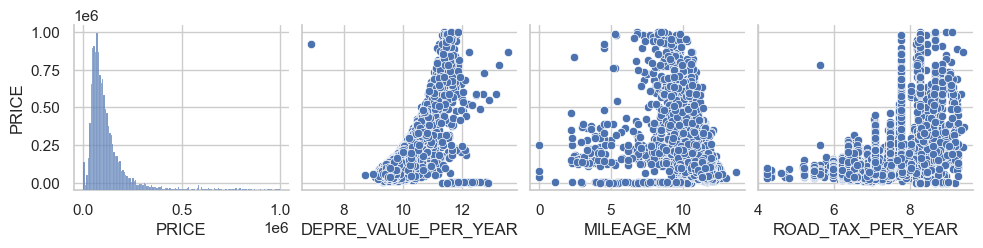

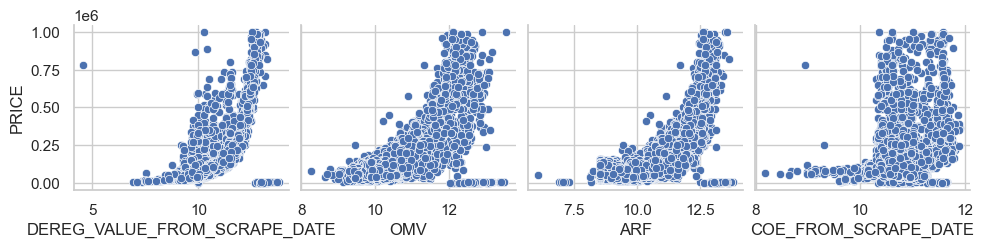

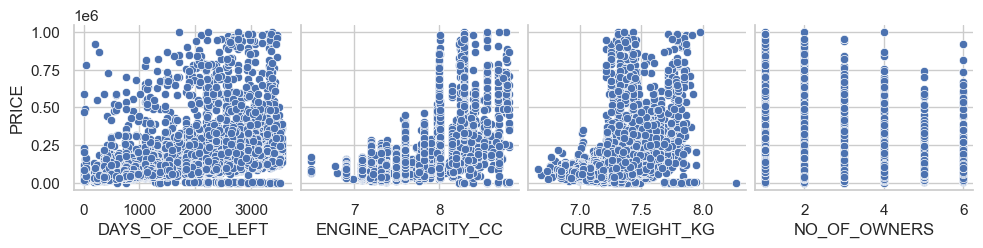

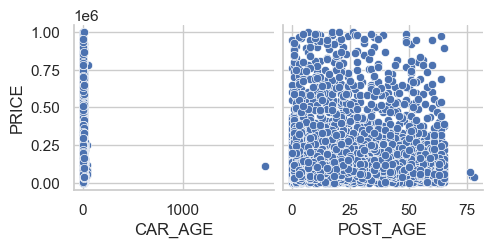

In [51]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['PRICE'])

<Axes: >

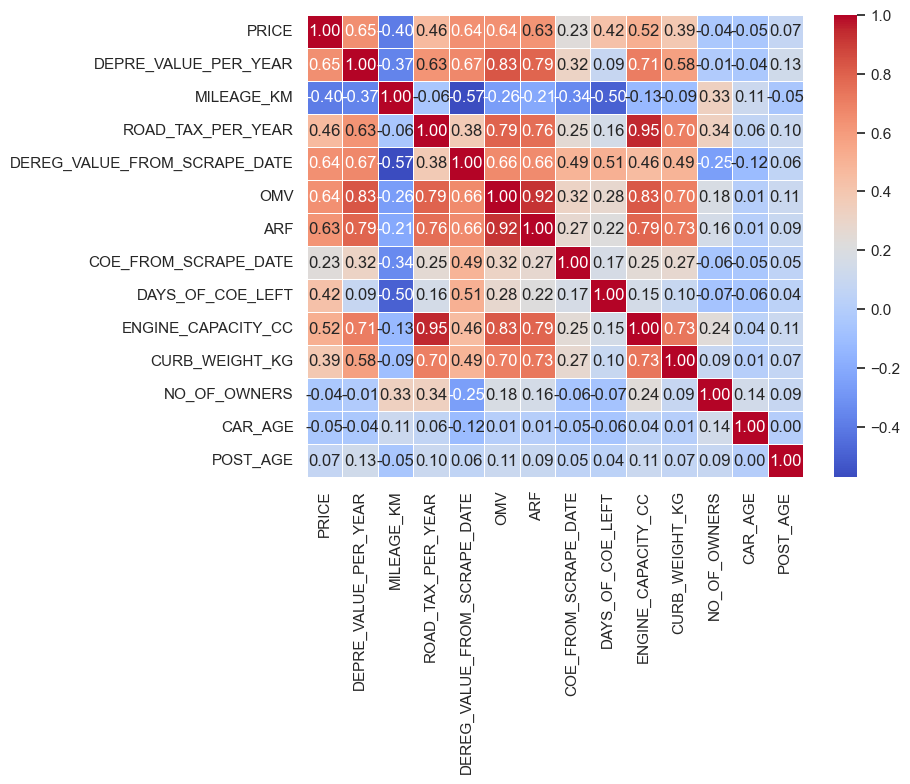

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### Categorical Data Distribution

In [53]:
cat_var=['CAR_CATEGORY',
         'MANUFACTURED_YEAR',
         'TRANSMISSION',
         'VEHICLE_TYPE'
#         'REG_DATE',
#         'POST_DATE'        
]

df_cat=df_clean[cat_var]
df_cat.head()

,CAR_CATEGORY,MANUFACTURED_YEAR,TRANSMISSION,VEHICLE_TYPE
0,LUXURY,2015,1,Luxury Sedan
2,MID_LEVEL,2018,1,Sports Car
4,ECONOMY,2019,1,MPV
5,LUXURY,2010,1,Luxury Sedan
7,ECONOMY,2018,1,Luxury Sedan


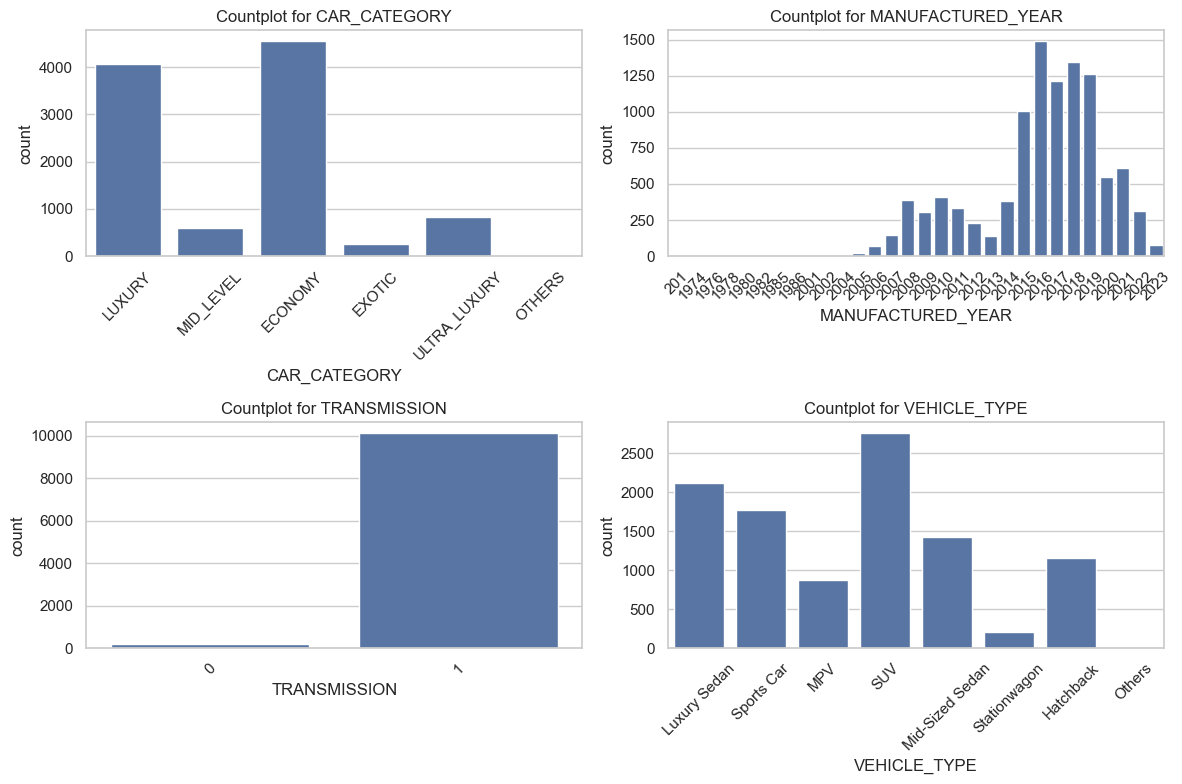

In [54]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Optional: Set the plot style

for i, column in enumerate(df_cat.columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, data=df_cat)
    plt.xticks(rotation=45)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

In [55]:
# plt.figure(figsize = (12, 6))
# ax = sns.boxplot(x='VEHICLE_TYPE', y='PRICE', data=df_clean)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
# plt.xticks(rotation=45)

## Feature Selection: Dropping Highly Correlated Features

1. **OMV and ARF:** 
The Additional Registration Fee (ARF) is a tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle. From the correlation matrix, they have a correlation of **0.89.** Therefore, we can just keep one of this. Therefore, **ARF** will be dropped.

2. **Engine CC and Road Tax:** 
Road tax increases as engine CC increases. Therefore, having Road Tax in it would be introducing multicolinearity into the model, since both explain the same thing anyway. From the correlation matrix, they have a correlation of **0.93**. Therefore, **road tax** column will be dropped.

In [56]:
df_clean_log.columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'POST_DATE', 'CAR_AGE', 'POST_AGE',
       'TRANSMISSION', 'VEHICLE_TYPE_Hatchback', 'VEHICLE_TYPE_Luxury Sedan',
       'VEHICLE_TYPE_MPV', 'VEHICLE_TYPE_Mid-Sized Sedan',
       'VEHICLE_TYPE_Others', 'VEHICLE_TYPE_SUV', 'VEHICLE_TYPE_Sports Car',
       'VEHICLE_TYPE_Stationwagon', 'CAR_CATEGORY', 'CAR_CATEGORY_ECONOMY',
       'CAR_CATEGORY_EXOTIC', 'CAR_CATEGORY_LUXURY', 'CAR_CATEGORY_MID_LEVEL',
       'CAR_CATEGORY_OTHERS', 'CAR_CATEGORY_ULTRA_LUXURY'],
      dtype='object')

In [57]:
#Drop 'ARF', 'ROAD_TAX_PER_YEAR','REG_DATE','MANUFACTURED_YEAR','VEHICLE_TYPE','POST_DATE','CAR_CATEGORY'
df_clean_log.drop('ARF', axis=1, inplace=True)
df_clean_log.drop('ROAD_TAX_PER_YEAR', axis=1, inplace=True)

#Dropping columns not needed in our regression as they have been encoded 
df_clean_log.drop('BRAND', axis=1, inplace=True)
df_clean_log.drop('REG_DATE', axis=1, inplace=True)
df_clean_log.drop('MANUFACTURED_YEAR', axis=1, inplace=True)
df_clean_log.drop('VEHICLE_TYPE', axis=1, inplace=True)
df_clean_log.drop('POST_DATE', axis=1, inplace=True)
df_clean_log.drop('CAR_CATEGORY', axis=1, inplace=True)
df_clean_log.columns

Index(['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'CAR_AGE', 'POST_AGE', 'TRANSMISSION',
       'VEHICLE_TYPE_Hatchback', 'VEHICLE_TYPE_Luxury Sedan',
       'VEHICLE_TYPE_MPV', 'VEHICLE_TYPE_Mid-Sized Sedan',
       'VEHICLE_TYPE_Others', 'VEHICLE_TYPE_SUV', 'VEHICLE_TYPE_Sports Car',
       'VEHICLE_TYPE_Stationwagon', 'CAR_CATEGORY_ECONOMY',
       'CAR_CATEGORY_EXOTIC', 'CAR_CATEGORY_LUXURY', 'CAR_CATEGORY_MID_LEVEL',
       'CAR_CATEGORY_OTHERS', 'CAR_CATEGORY_ULTRA_LUXURY'],
      dtype='object')

In [58]:
df_clean_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10311 entries, 0 to 16591
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRICE                         10311 non-null  float64
 1   DEPRE_VALUE_PER_YEAR          10311 non-null  float64
 2   MILEAGE_KM                    10311 non-null  float64
 3   DEREG_VALUE_FROM_SCRAPE_DATE  10311 non-null  float64
 4   OMV                           10311 non-null  float64
 5   COE_FROM_SCRAPE_DATE          10311 non-null  float64
 6   DAYS_OF_COE_LEFT              10311 non-null  float64
 7   ENGINE_CAPACITY_CC            10311 non-null  float64
 8   CURB_WEIGHT_KG                10311 non-null  float64
 9   NO_OF_OWNERS                  10311 non-null  float64
 10  CAR_AGE                       10311 non-null  float64
 11  POST_AGE                      10311 non-null  int64  
 12  TRANSMISSION                  10311 non-null  int64  
 13  VEHICL

## Splitting Train / Test Data

In [59]:
x_var=df_clean_log.drop('PRICE', axis=1)


y= df_clean_log['PRICE']

test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(x_var, y, test_size=test_size, random_state=seed)

## Run Regression Models (Default [Use MILEAGE_KM_MAX])

We will use 10-fold cross validation when running our models. Mean Square Error (MSE) metric is used to evaluate our chosen algorithms. We will also call out RMSE and R-squared metrics for reference.

Six algorithms are selected to spot-check as baseline including:

- Linear Regression (LR)
- Lasso Regression (LASSO),
- ElasticNet (EN),
- Classification and Regression Tree (CART),
- Support Vector Regression (SVR)

In [60]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
#models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [61]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)    
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)

LR: -7611635423.472323 (1793311671.348821)  rmse= 86674.527 (9957.998)  r2= 0.544
LASSO: -7605429203.283167 (1780541795.774591)  rmse= 86645.264 (9900.878)  r2= 0.545
EN: -10368176895.089275 (6646116297.750325)  rmse= 98475.857 (25897.536)  r2= 0.374
CART: -2662494424.303595 (911052294.853812)  rmse= 48010.1 (8652.505)  r2= 0.852
SVR: -18058960423.262077 (2295276514.862245)  rmse= 134118.866 (8431.502)  r2= -0.076


## Run Regression Models (After Standardization [StandardScaler])

In [62]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)
    

ScaledLR: -7648531496.795351 (1780908578.629490)  rmse= 86891.184 (9922.38)  r2= 0.543
ScaledLASSO: -7610953712.731280 (1791870484.827322)  rmse= 86671.334 (9951.566)  r2= 0.545
ScaledEN: -9117997094.177067 (4925076243.162420)  rmse= 93085.764 (21284.68)  r2= 0.451
ScaledCART: -2569785121.022450 (1004339913.390455)  rmse= 50937.754 (9377.839)  r2= 0.848
ScaledSVR: -18103420150.648964 (2298380813.679356)  rmse= 134284.416 (8433.02)  r2= -0.079


## Run Regression Models (After Standardization [MinMaxScaler])

In [63]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)
    

ScaledLR: -31554872739063926064767712624640.000000 (94664618217191769187103883132928.000000)  rmse= 1776369126668871.5 (5329107379747718.0)  r2= -1.5870093313012825e+21
ScaledLASSO: -7600445645.871641 (1769926624.880654)  rmse= 86621.926 (9853.305)  r2= 0.545
ScaledEN: -12892967540.451290 (1747580901.063519)  rmse= 113293.444 (7587.031)  r2= 0.232
ScaledCART: -2328355960.480513 (1045551728.508391)  rmse= 49778.304 (9430.975)  r2= 0.869
ScaledSVR: -18111880359.665627 (2300628907.277048)  rmse= 134315.409 (8441.042)  r2= -0.079


## Ensemble Methods


Boosting Methods:

- AdaBosst (AB)
- Gradient Boosting (GBM)

Bagging Methods:

- Random Forest (FR)
- Extra Trees (ET)

As before, we use 10-fold cross validation and pipelines to standardize the training data.

In [64]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)

ScaledAB: -4727977919.137303 (1045414220.164992)  rmse= 71173.1 (11426.527)  r2= 0.645
ScaledGBM: -1914322387.548389 (929380016.646658)  rmse= 42899.343 (10859.053)  r2= 0.888
ScaledRF: -1653143804.401887 (903866448.224296)  rmse= 38773.427 (11226.802)  r2= 0.902
ScaledET: -1468621176.207449 (746190655.641310)  rmse= 36210.038 (8565.664)  r2= 0.916


## Tuning Ensemble Methods


In [65]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1608951409.072749 using {'n_estimators': 50}
-1608951409.072749 (906529203.098433) with: {'n_estimators': 50}
-1650203523.609807 (925971024.253900) with: {'n_estimators': 100}
-1647145045.902304 (891017409.091345) with: {'n_estimators': 150}
-1651278085.021473 (915933386.136493) with: {'n_estimators': 200}
-1653015666.070397 (932737178.366081) with: {'n_estimators': 250}
-1658397290.780967 (945852012.814917) with: {'n_estimators': 300}
-1674372415.256809 (976313886.751908) with: {'n_estimators': 350}
-1658619788.123025 (952641599.936738) with: {'n_estimators': 400}


In [67]:
warnings.filterwarnings("ignore")
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(n_estimators=50)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
print("RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test, predictions)), 3)))
print("R squared error : {}".format(round(r2_score(y_test,predictions), 3)))

MSE : 2158174711.999
RMSE : 46456.159
R squared error : 0.857


In [66]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1403085789.403877 using {'n_estimators': 400}
-1471346242.975804 (668728467.894141) with: {'n_estimators': 50}
-1427107106.537804 (758777871.661474) with: {'n_estimators': 100}
-1405688228.495529 (673147950.237069) with: {'n_estimators': 150}
-1427525240.633979 (708995302.725737) with: {'n_estimators': 200}
-1421566907.436398 (680545594.446276) with: {'n_estimators': 250}
-1444242334.409416 (714821751.715152) with: {'n_estimators': 300}
-1428751382.996414 (736869647.847725) with: {'n_estimators': 350}
-1403085789.403877 (680544094.577441) with: {'n_estimators': 400}


In [68]:
warnings.filterwarnings("ignore")
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(n_estimators=400)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
print("RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test, predictions)), 3)))
print("R squared error : {}".format(round(r2_score(y_test,predictions), 3)))

MSE : 1306130403.563
RMSE : 36140.426
R squared error : 0.914


# Final Model Result

In [69]:
warnings.filterwarnings("ignore")
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(n_estimators=400)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
print("RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test, predictions)), 3)))
print("R squared error : {}".format(round(r2_score(y_test,predictions), 3)))

MSE : 1287479472.398
RMSE : 35881.464
R squared error : 0.915


Text(0, 0.5, 'Residuals')

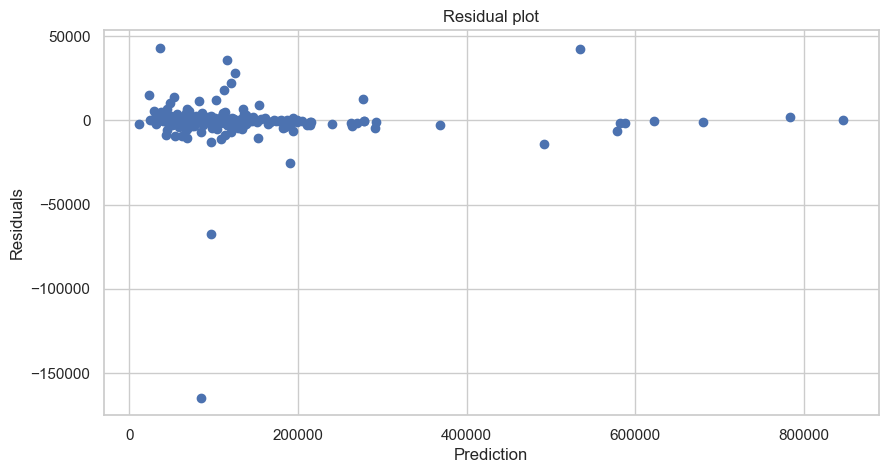

In [70]:
# Defining Graph size
plt.figure(figsize=(10,5))
df_predictions=pd.DataFrame()
# Defining the residue and model predicted results
df_predictions['PREDICTIONS'] = predictions
df_predictions['RESIDUE'] = y_test - predictions

# Plot your predicted values on the x-axis, and your residuals on the y-axis on Residue Plot
plt.scatter(df_predictions['PREDICTIONS'], df_predictions['RESIDUE'])
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")